In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from growth.sweep.sweep import Sweep
from clones.validation.sweep import SweepBenchmark
%matplotlib inline

In [2]:
ls ../synthetic/

Sweep_181201_191409/     Sweep_181201_191516_new/ build_sweep.py
Sweep_181201_191516/     Sweep_181201_191521/


In [3]:
sweep_path = '../synthetic/Sweep_181201_191516_new'
sweep = Sweep.load(sweep_path)
benchmark = SweepBenchmark.load(sweep_path)

In [4]:
batch_id, scale_id = 0, 0
batch_benchmark = benchmark.load_benchmark(batch_id, scale_id)

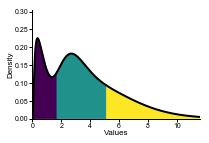

In [5]:
batch_benchmark.classifier.plot_pdf()

In [93]:
batch_benchmark.rule = 'proportional'
batch_benchmark.twolevel = True

In [94]:
simulation_benchmark = batch_benchmark.benchmark_simulation(0)

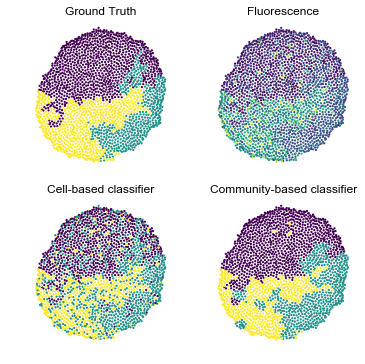

In [99]:
simulation_benchmark.show()

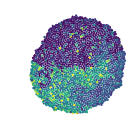

In [100]:
simulation_benchmark.plot_measurements(s=5)

In [97]:
simulation_benchmark.community_MAE

0.05114094064320429

In [98]:
simulation_benchmark.simple_MAE

0.1258553422126979

In [110]:
from clones.annotation.model_selection import Merge

In [534]:
fl.scale

array([1, 2, 4])

In [520]:
from growth.measure.fluorescence import Fluorescence

In [555]:

sigma = np.array([1, 2, 4]) # loc
mu = np.array([4, 2, 1]) # scale
fl = Fluorescence(mu=mu, sigma=sigma)

In [556]:
support = np.linspace(1, fl.saturation, 100)
pdfs = [fl.freeze_univariate(i).pdf(support) for i in range(3)]

In [557]:
Merge.jensen_shannon_distance(pdfs[0], pdfs[1])

0.0025221975780472493

In [558]:
Merge.jensen_shannon_distance(pdfs[1], pdfs[2])

0.013659506078500784

(0, 0.15)

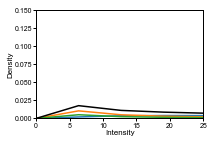

In [559]:
fl.show_pdf()
ax = plt.gca()
ax.set_xlim(0, 25)
ax.set_ylim(0, .15)

In [561]:
np.linspace(3, 10, 10-3+1)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [106]:
true_genotype_indices = simulation_benchmark.df.groupby('ground').indices

In [108]:
for genotype, ind in true_genotype_indices.items():
    ind

In [109]:
ind

array([1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490,
       1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501,
       1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512,
       1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523,
       1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534,
       1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545,
       1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556,
       1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567,
       1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578,
       1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589,
       1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600,
       1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611,
       1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622,
       1623, 1624, 1625, 1626, 1627, 1628, 1629, 16

In [29]:
import networkx as nx
from clones.spatial.infomap import InfoMap

In [30]:
annotator = simulation_benchmark.annotator

In [34]:
infomap_obj = InfoMap(annotator.graph.build_links(), twolevel=True)
index_to_genotype = np.vectorize(annotator.graph.df.community_genotype.to_dict().get)
transclone_edges = annotator.graph.edges[(np.diff(index_to_genotype(annotator.graph.edges), axis=1)!=0).ravel()]
transcommunity_edges = infomap_obj(transclone_edges)
transcommunity_edges = np.unique(np.sort(transcommunity_edges, axis=1), axis=0)

In [35]:
community_to_indices = annotator.graph.df.groupby('community').indices
get_data = lambda community_id: annotator.graph.df.iloc[community_to_indices[community_id]]
evaluate_posterior = lambda community_id: annotator.cell_classifier.evaluate_posterior(get_data(community_id))

def evaluate_merger(communities):
    """ Evaluate posterior before and after merging pair of <communities>. """
    posterior_x = evaluate_posterior(communities[0])
    posterior_y = evaluate_posterior(communities[1])
    posterior_merged = np.vstack((posterior_x, posterior_y))
    max_posterior_separate = max(posterior_x.mean(axis=0).max(), posterior_y.mean(axis=0).max())
    max_posterior_merged = posterior_merged.mean(axis=0).max()
    merge = max_posterior_merged > max_posterior_separate
    return merge

In [36]:
sum(list(map(evaluate_merger, transcommunity_edges)))

0

In [458]:
test = np.random.random((10, 3))
test /= test.sum(axis=1).reshape(-1, 1)
 



print('current', test.mean(axis=0).argmax())
print('new', new)

current 2
new 2


In [389]:
def voter(posterior):
    confidence, genotypes = posterior.max(axis=1) , posterior.argmax(axis=1)   
    ind = np.argsort(genotypes)
    starts = np.searchsorted(genotypes[ind], np.arange(4))
    lengths = np.diff(starts)    
    return np.argmax([confidence[ind][slice(s, s+l)].sum() for s, l in zip(starts[:-1], lengths)])

current 1
new 0


In [375]:
starts

array([ 0,  2,  6, 10])

array([0.39943306, 0.37991861, 0.52630768, 0.56852259, 0.91814635,
       0.55345116, 0.46236173, 0.46127635, 0.4516243 , 0.40271046])

In [377]:
genotypes

array([0, 0, 1, 1, 1, 1, 2, 2, 2, 2])

slice(7, 10, None)

In [149]:
intercommunity_edges = np.unique(np.sort(community_edges[(np.diff(community_edges, axis=1)!=0).nonzero()[0]], axis=1), axis=0)

In [ ]:
[community_to_indices[community] for community in edge]

In [191]:
evaluate_merger(intercommunity_edges[0])

[array([0.20945352, 0.71454805, 0.07599843]),
 array([0.116708  , 0.6590875 , 0.22420451])]

In [192]:
intercommunity_edges

array([[  0,   1],
       [  0,   2],
       [  0,   3],
       [  0,   4],
       [  0,   5],
       [  0,   6],
       [  0,   7],
       [  1,   3],
       [  1,   7],
       [  1,   8],
       [  1,   9],
       [  1,  11],
       [  1,  13],
       [  1,  18],
       [  2,   3],
       [  2,   5],
       [  2,  14],
       [  2,  15],
       [  2, 126],
       [  2, 130],
       [  3,  13],
       [  3,  15],
       [  4,   5],
       [  4,   6],
       [  4, 111],
       [  4, 127],
       [  5, 126],
       [  5, 127],
       [  6,   7],
       [  6, 105],
       [  6, 106],
       [  6, 107],
       [  6, 111],
       [  6, 112],
       [  7,   8],
       [  7, 105],
       [  8,  18],
       [  8, 105],
       [  9,  10],
       [  9,  11],
       [  9,  12],
       [  9,  18],
       [ 10,  11],
       [ 10,  12],
       [ 10,  19],
       [ 11,  13],
       [ 12,  16],
       [ 12,  18],
       [ 12,  19],
       [ 13,  15],
       [ 13, 133],
       [ 14,  15],
       [ 14,

In [196]:
annotator.graph.df.groupby('community')['community_genotype'].mean()

community
0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      2
8      1
9      1
10     1
11     2
12     1
13     1
14     2
15     2
16     2
17     2
18     1
19     1
20     1
21     1
22     1
23     1
24     2
25     1
26     1
27     1
28     1
29     1
      ..
220    0
221    0
222    0
223    2
224    0
225    0
226    0
227    2
228    0
229    0
230    0
231    0
232    0
233    0
234    0
235    0
236    0
237    0
238    0
239    0
240    0
241    2
242    2
243    0
244    0
245    0
246    0
247    0
248    0
249    0
Name: community_genotype, Length: 250, dtype: int64

In [ ]:
evaluate_posterior

,centroid_x,centroid_y,ground,fluorescence,simple_genotype,community,community_genotype
31,0.194498,-0.630649,1,2.187699,1,2,1
35,0.130123,-0.579730,1,3.083249,1,2,1
36,0.215909,-0.569158,1,4.494558,1,2,1
37,0.178519,-0.585730,1,2.641196,1,2,1
38,0.157734,-0.568908,1,4.452746,1,2,1
44,0.217839,-0.663129,1,3.267313,1,2,1
61,0.155692,-0.626482,1,1.844919,1,2,1
145,0.227725,-0.608616,1,3.272314,1,2,1
149,0.255546,-0.643100,1,3.089612,1,2,1
1562,0.196841,-0.519183,2,8.166420,2,2,1


In [158]:
communities = annotator.graph.df.groupby('community')

In [ ]:
community_to_genotype = communities.apply(voter).to_dict()

In [ ]:
posterior = cell_classifier.evaluate_posterior(x)

In [7]:
community_classifier = annotator.labeler

In [8]:
graph = annotator.graph

In [9]:
from clones.spatial.infomap import InfoMap

In [12]:
map_obj

In [ ]:
print("\nModules at depth 2:\n#node module")
for module in map_obj.infomap.iterModules(1):
    
    print("%d %d" % (node.physicalId, node.moduleIndex()))

In [82]:
parents, unique_ids, module_indices = {}, {}, {}
for unique_id, module in enumerate(map_obj.infomap.iterModules()):
    unique_ids[module.path()] = unique_id
    
    if len(module.path()) == 0:
        parent_id = -1
    else:
        parent_id = unique_ids[module.path()[:-1]]

    parents[unique_id] = parent_id
        
    if module.isLeafModule():
        module_indices[unique_id] = module.moduleIndex()

        
children = {unique_id: [] for unique_id in unique_ids.values()}
children[-1] = []
for child, parent in parents.items():
    children[parent].append(child)    
    
module_to_unique_id = {module_index: unique_id for unique_id, module_index in module_indices.items()}

In [85]:
module_to_parent_id = {module_id: parents[unique_id] for module_id, unique_id in module_to_unique_id.items()}

In [93]:
children[0]

[1, 118, 181]

In [88]:
module_to_parent_id

{0: 2,
 1: 2,
 2: 2,
 3: 2,
 4: 2,
 5: 2,
 6: 2,
 7: 2,
 8: 2,
 9: 2,
 10: 2,
 11: 2,
 12: 2,
 13: 2,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 22,
 19: 22,
 20: 22,
 21: 22,
 22: 22,
 23: 22,
 24: 22,
 25: 30,
 26: 30,
 27: 30,
 28: 30,
 29: 30,
 30: 30,
 31: 30,
 32: 30,
 33: 30,
 34: 30,
 35: 41,
 36: 41,
 37: 41,
 38: 41,
 39: 41,
 40: 41,
 41: 41,
 42: 41,
 43: 41,
 44: 41,
 45: 41,
 46: 41,
 47: 41,
 48: 41,
 49: 56,
 50: 56,
 51: 56,
 52: 56,
 53: 56,
 54: 56,
 55: 56,
 56: 64,
 57: 64,
 58: 64,
 59: 64,
 60: 64,
 61: 64,
 62: 64,
 63: 64,
 64: 64,
 65: 64,
 66: 75,
 67: 75,
 68: 75,
 69: 75,
 70: 75,
 71: 75,
 72: 75,
 73: 75,
 74: 75,
 75: 75,
 76: 75,
 77: 75,
 78: 75,
 79: 75,
 80: 75,
 81: 75,
 82: 75,
 83: 93,
 84: 93,
 85: 93,
 86: 93,
 87: 93,
 88: 93,
 89: 93,
 90: 93,
 91: 93,
 92: 93,
 93: 93,
 94: 93,
 95: 93,
 96: 93,
 97: 93,
 98: 109,
 99: 109,
 100: 109,
 101: 109,
 102: 109,
 103: 109,
 104: 109,
 105: 109,
 106: 119,
 107: 119,
 108: 119,
 109: 119,
 110: 119,
 111:

In [111]:
def recurse(parent):
    nodes = children[parent]    
    if len(nodes) < 1:
        return 1
    else:
        all_children_are_leaves = min([recurse(child) for child in nodes])
        if all_children_are_leaves:
            # MERGE CHILDREN            
            print(parent, nodes)
        
        # 
            
        return 0

In [36]:
from functools import reduce
from operator import add
reduce(add, ['a', 'b'])

'ab'

In [63]:
children = {}
for child, parent in parents.items():
    if parent not in children.keys():
        children[parent] = []
    children[parent].append(child)    

In [ ]:
for m

In [65]:
children

{(): [(), (0,), (1,)],
 (0,): [(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (0, 6),
  (0, 7),
  (0, 8),
  (0, 9),
  (0, 10)],
 (0, 0): [(0, 0, 0),
  (0, 0, 1),
  (0, 0, 2),
  (0, 0, 3),
  (0, 0, 4),
  (0, 0, 5),
  (0, 0, 6),
  (0, 0, 7),
  (0, 0, 8),
  (0, 0, 9),
  (0, 0, 10),
  (0, 0, 11),
  (0, 0, 12)],
 (0, 1): [(0, 1, 0),
  (0, 1, 1),
  (0, 1, 2),
  (0, 1, 3),
  (0, 1, 4),
  (0, 1, 5),
  (0, 1, 6),
  (0, 1, 7),
  (0, 1, 8),
  (0, 1, 9),
  (0, 1, 10),
  (0, 1, 11),
  (0, 1, 12),
  (0, 1, 13)],
 (0, 1, 4): [(0, 1, 4, 0), (0, 1, 4, 1), (0, 1, 4, 2), (0, 1, 4, 3)],
 (0, 2): [(0, 2, 0),
  (0, 2, 1),
  (0, 2, 2),
  (0, 2, 3),
  (0, 2, 4),
  (0, 2, 5),
  (0, 2, 6),
  (0, 2, 7),
  (0, 2, 8),
  (0, 2, 9),
  (0, 2, 10)],
 (0, 3): [(0, 3, 0),
  (0, 3, 1),
  (0, 3, 2),
  (0, 3, 3),
  (0, 3, 4),
  (0, 3, 5),
  (0, 3, 6),
  (0, 3, 7),
  (0, 3, 8),
  (0, 3, 9),
  (0, 3, 10),
  (0, 3, 11),
  (0, 3, 12),
  (0, 3, 13)],
 (0, 4): [(0, 4, 0),
  (0, 4, 1),
  (0, 4, 2),
  (0, 4, 3),
  (0,

In [61]:
module_paths = []

parents = {}
unique_module_id = 0
for module in map_obj.infomap.iterModules():
    
    
    parents[module.path()] = module.path()[:-1]
    
    if module.isLeafModule():
        print(module.moduleIndex(), module.path(), unique_module_id)
        
    unique_module_id += 1

0 (0, 0, 0) 3
1 (0, 0, 1) 4
2 (0, 0, 2) 5
3 (0, 0, 3) 6
4 (0, 0, 4) 7
5 (0, 0, 5) 8
6 (0, 0, 6) 9
7 (0, 0, 7) 10
8 (0, 0, 8) 11
9 (0, 0, 9) 12
10 (0, 0, 10) 13
11 (0, 0, 11) 14
12 (0, 0, 12) 15
13 (0, 1, 0) 17
14 (0, 1, 1) 18
15 (0, 1, 2) 19
16 (0, 1, 3) 20
17 (0, 1, 4, 0) 22
18 (0, 1, 4, 1) 23
19 (0, 1, 4, 2) 24
20 (0, 1, 4, 3) 25
21 (0, 1, 5) 26
22 (0, 1, 6) 27
23 (0, 1, 7) 28
24 (0, 1, 8) 29
25 (0, 1, 9) 30
26 (0, 1, 10) 31
27 (0, 1, 11) 32
28 (0, 1, 12) 33
29 (0, 1, 13) 34
30 (0, 2, 0) 36
31 (0, 2, 1) 37
32 (0, 2, 2) 38
33 (0, 2, 3) 39
34 (0, 2, 4) 40
35 (0, 2, 5) 41
36 (0, 2, 6) 42
37 (0, 2, 7) 43
38 (0, 2, 8) 44
39 (0, 2, 9) 45
40 (0, 2, 10) 46
41 (0, 3, 0) 48
42 (0, 3, 1) 49
43 (0, 3, 2) 50
44 (0, 3, 3) 51
45 (0, 3, 4) 52
46 (0, 3, 5) 53
47 (0, 3, 6) 54
48 (0, 3, 7) 55
49 (0, 3, 8) 56
50 (0, 3, 9) 57
51 (0, 3, 10) 58
52 (0, 3, 11) 59
53 (0, 3, 12) 60
54 (0, 3, 13) 61
55 (0, 4, 0) 63
56 (0, 4, 1) 64
57 (0, 4, 2) 65
58 (0, 4, 3) 66
59 (0, 4, 4) 67
60 (0, 4, 5) 68
61 (0, 4, 6) 69
6

In [42]:
paths = []
for module in map_obj.infomap.iterLeafModules():
    paths.append([module.moduleIndex(), module.path()])

In [45]:
pd.DataFrame(paths, columns=['ModuleID', 'Path'])

,ModuleID,Path
0,0,()
1,0,"(0, 0, 0)"
2,1,"(0, 0, 1)"
3,2,"(0, 0, 2)"
4,3,"(0, 0, 3)"
5,4,"(0, 0, 4)"
6,5,"(0, 0, 5)"
7,6,"(0, 0, 6)"
8,7,"(0, 0, 7)"
9,8,"(0, 0, 8)"


In [37]:

# Example
for node in map_obj.infomap.iterTree():
    if node.isLeaf:
        print("{} {}".format(node.path(), node.physicalId))

() 0
(0,) 0
(0, 0) 0
(0, 0, 0) 0
(0, 0, 0, 0) 0
(0, 0, 0, 1) 1
(0, 0, 0, 2) 10
(0, 0, 0, 3) 11
(0, 0, 0, 4) 12
(0, 0, 0, 5) 13
(0, 0, 0, 6) 14
(0, 0, 0, 7) 113
(0, 0, 0, 8) 2
(0, 0, 0, 9) 5
(0, 0, 0, 10) 6
(0, 0, 1) 0
(0, 0, 1, 0) 4
(0, 0, 1, 1) 7
(0, 0, 1, 2) 15
(0, 0, 1, 3) 61
(0, 0, 1, 4) 62
(0, 0, 1, 5) 117
(0, 0, 1, 6) 118
(0, 0, 1, 7) 119
(0, 0, 1, 8) 121
(0, 0, 2) 0
(0, 0, 2, 0) 16
(0, 0, 2, 1) 110
(0, 0, 2, 2) 111
(0, 0, 2, 3) 112
(0, 0, 2, 4) 96
(0, 0, 2, 5) 116
(0, 0, 2, 6) 120
(0, 0, 2, 7) 125
(0, 0, 2, 8) 77
(0, 0, 2, 9) 81
(0, 0, 3) 0
(0, 0, 3, 0) 33
(0, 0, 3, 1) 35
(0, 0, 3, 2) 3
(0, 0, 3, 3) 32
(0, 0, 3, 4) 53
(0, 0, 3, 5) 34
(0, 0, 3, 6) 38
(0, 0, 3, 7) 39
(0, 0, 3, 8) 40
(0, 0, 3, 9) 41
(0, 0, 3, 10) 52
(0, 0, 3, 11) 54
(0, 0, 4) 0
(0, 0, 4, 0) 93
(0, 0, 4, 1) 94
(0, 0, 4, 2) 95
(0, 0, 4, 3) 97
(0, 0, 4, 4) 99
(0, 0, 4, 5) 106
(0, 0, 4, 6) 108
(0, 0, 4, 7) 109
(0, 0, 5) 0
(0, 0, 5, 0) 107
(0, 0, 5, 1) 2104
(0, 0, 5, 2) 2105
(0, 0, 5, 3) 2106
(0, 0, 5, 4) 2107
(0, 0, 5,

(1, 1, 0, 1, 5) 1119
(1, 1, 0, 1, 6) 1120
(1, 1, 0, 1, 7) 1122
(1, 1, 0, 1, 8) 1340
(1, 1, 0, 1, 9) 1358
(1, 1, 0, 1, 10) 1121
(1, 1, 0, 2) 0
(1, 1, 0, 2, 0) 1110
(1, 1, 0, 2, 1) 1114
(1, 1, 0, 2, 2) 1109
(1, 1, 0, 2, 3) 1274
(1, 1, 0, 2, 4) 1277
(1, 1, 0, 2, 5) 1278
(1, 1, 0, 2, 6) 1336
(1, 1, 0, 2, 7) 1337
(1, 1, 0, 2, 8) 1338
(1, 1, 0, 2, 9) 1339
(1, 1, 0, 2, 10) 1341
(1, 1, 0, 2, 11) 1352
(1, 1, 0, 2, 12) 1353
(1, 1, 0, 2, 13) 1354
(1, 1, 0, 2, 14) 1355
(1, 1, 0, 2, 15) 1356
(1, 1, 0, 2, 16) 1357
(1, 1, 0, 3) 0
(1, 1, 0, 3, 0) 829
(1, 1, 0, 3, 1) 1199
(1, 1, 0, 3, 2) 1108
(1, 1, 0, 3, 3) 1123
(1, 1, 0, 3, 4) 1128
(1, 1, 0, 3, 5) 1129
(1, 1, 0, 3, 6) 1133
(1, 1, 0, 3, 7) 1188
(1, 1, 0, 3, 8) 1130
(1, 1, 0, 4) 0
(1, 1, 0, 4, 0) 1124
(1, 1, 0, 4, 1) 1198
(1, 1, 0, 4, 2) 1126
(1, 1, 0, 4, 3) 1125
(1, 1, 0, 4, 4) 1137
(1, 1, 0, 4, 5) 1138
(1, 1, 0, 4, 6) 1143
(1, 1, 0, 4, 7) 1144
(1, 1, 0, 4, 8) 1145
(1, 1, 0, 4, 9) 1187
(1, 1, 0, 5) 0
(1, 1, 0, 5, 0) 862
(1, 1, 0, 5, 1) 1183
(1, 1, 0, 

In [ ]:
for x in map_obj.infomap.consolidateModules():
    pass

In [70]:
print("Found %d top modules with codelength: %f" % (tree.numTopModules(), tree.codelength()))

# print("Writing top level modules to %s_level1.clu..." % name)
# tree.writeClu("%s_level1.clu" % name, 1)
# print("Writing second level modules to %s_level2.clu..." % name)
# tree.writeClu("%s_level2.clu" % name, 2)

# print("Writing tree to %s.tree..." % name)
# tree.writeHumanReadableTree("%s.tree" % name)

# print("\nModules at depth 1:\n#node module")
# for node in tree.leafIter(1):
# 	print("%d %d" % (node.physIndex, node.moduleIndex()))

# print("\nModules at depth 2:\n#node module")
# for node in tree.leafIter(2):
# 	print("%d %d" % (node.physIndex, node.moduleIndex()))

# print("\nModules at lowest level:\n#node module")
# for node in tree.leafIter(-1): # default -1
# 	print("%d %d" % (node.physIndex, node.moduleIndex()))

# print("\nModules at all levels:\n#node path childDegree")
# for node in tree.treeIter():
# 	if node.isLeaf:
# print("%d %s %d" % (node.physIndex, node.path(), node.childDegree()))

AttributeError: 'InfomapIterator' object has no attribute 'numTopModules'

In [13]:
branches = []
for module in map_obj.infomap.iterModules():
    if module.isLeafModule():
        branches.append(module.path())


In [18]:
for module in map_obj.infomap.iterModules():
    #print(module.moduleIndex())
    print(module.physicalId)
    
    

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [1]:
module

NameError: name 'module' is not defined

In [ ]:
class Parent:
    

In [ ]:
edges = self.build_links()
        community_detector = InfoMap(edges, **kwargs)
        self.community_labels = community_detector(self.nodes)

In [29]:
# find neighboring communities
label_community = np.vectorize(dict(enumerate(simulation_benchmark.df.community.values)).get)

In [30]:
label_community(annotator.graph.edges)

array([[112, 112],
       [115, 115],
       [108, 108],
       ...,
       [219, 219],
       [224, 219],
       [219, 224]])

In [ ]:
def voter(x):
                posterior = cell_classifier.evaluate_posterior(x)
                return posterior.mean(axis=0).argmax()

In [17]:
simulation_benchmark.df

,centroid_x,centroid_y,ground,fluorescence,simple_genotype,community,community_genotype
0,0.005203,-0.613773,1,2.217384,1,0,1
1,0.049206,-0.623072,1,2.419563,1,0,1
2,0.043215,-0.578854,1,4.821808,1,12,1
3,0.007155,-0.565074,1,3.677889,1,14,1
4,0.118149,-0.625145,1,3.117665,1,0,1
5,0.088932,-0.602255,1,2.591825,1,0,1
6,0.081660,-0.639340,1,2.615103,1,0,1
7,0.079315,-0.661363,1,2.884261,1,0,1
8,-0.040187,-0.591193,1,4.471313,1,16,1
9,-0.054415,-0.634184,1,4.199207,1,16,1


In [31]:
simulation_benchmark.annotator.cell_classifier